In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('uber-raw-data-sep14.csv')

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [5]:
df.shape

(45541, 4)

In [6]:
df['Date/Time'].sample(5)

42843     9/2/2014 16:03:00
37022     9/1/2014 16:35:00
11882    9/10/2014 10:13:00
37628     9/1/2014 18:26:00
30426    9/26/2014 18:14:00
Name: Date/Time, dtype: object

In [7]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [8]:
df['Date/Time'].sample(5)

9279    2014-09-08 06:57:00
25329   2014-09-21 00:13:00
10393   2014-09-09 05:19:00
10266   2014-09-08 21:37:00
40984   2014-09-02 10:13:00
Name: Date/Time, dtype: datetime64[ns]

In [9]:
def get_dom(dt):
    return dt.day
df['dom']=df['Date/Time'].map(get_dom)

In [10]:
def get_weekday(dt):
    return dt.weekday()
df['weekday']=df['Date/Time'].map(get_weekday)
def get_hour(dt):
    return dt.hour
df['hour']=df['Date/Time'].map(get_hour)

In [11]:
df.sample(5)

,Date/Time,Lat,Lon,Base,dom,weekday,hour
37161,2014-09-01 16:58:00,40.7257,-74.0054,B02598,1,0,16
43864,2014-09-02 18:03:00,40.7348,-74.0080,B02598,2,1,18
28522,2014-09-24 17:56:00,40.7494,-73.9954,B02512,24,2,17
44514,2014-09-02 19:20:00,40.7403,-73.9903,B02598,2,1,19
553,2014-09-01 21:02:00,40.7739,-73.8726,B02512,1,0,21


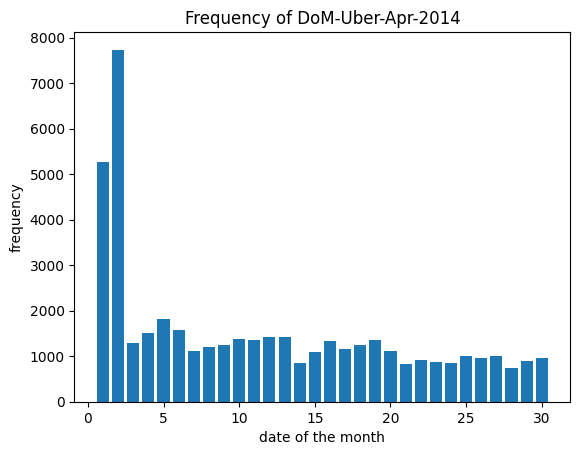

In [12]:
plt.hist(df.dom,bins=30,rwidth=.8,range=(0.5,30.5))
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency of DoM-Uber-Apr-2014')
plt.show()

In [13]:
def count_rows(rows):
    return len(rows)
by_date=df.groupby('dom').apply(count_rows)
by_date

dom
1     5264
2     7733
3     1284
4     1513
5     1808
6     1580
7     1124
8     1211
9     1254
10    1374
11    1365
12    1423
13    1426
14     846
15    1083
16    1339
17    1158
18    1247
19    1348
20    1104
21     834
22     917
23     866
24     860
25    1015
26     953
27    1005
28     734
29     905
30     968
dtype: int64

<BarContainer object of 30 artists>

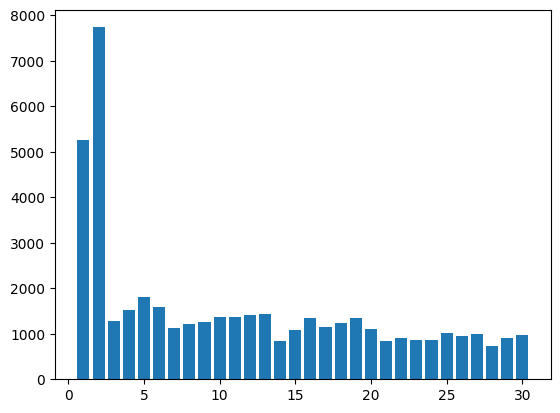

In [14]:
plt.bar(range(1,31),by_date)

In [15]:
by_date_sorted= by_date.sort_values()
by_date_sorted

dom
28     734
21     834
14     846
24     860
23     866
29     905
22     917
26     953
30     968
27    1005
25    1015
15    1083
20    1104
7     1124
17    1158
8     1211
18    1247
9     1254
3     1284
16    1339
19    1348
11    1365
10    1374
12    1423
13    1426
4     1513
6     1580
5     1808
1     5264
2     7733
dtype: int64

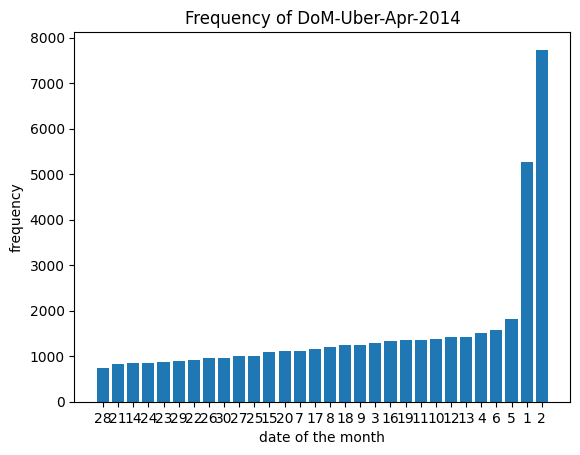

In [16]:
plt.bar(range(1,31),by_date_sorted)
plt.xticks(range(1,31),by_date_sorted.index)
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency of DoM-Uber-Apr-2014')
plt.show()

''

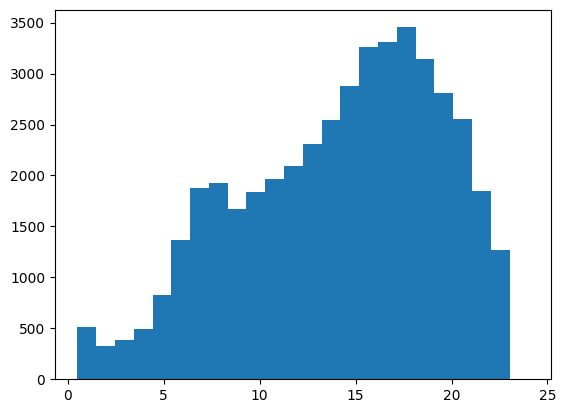

In [17]:
plt.hist(df.hour, bins=24, range=(.5, 24))
;

''

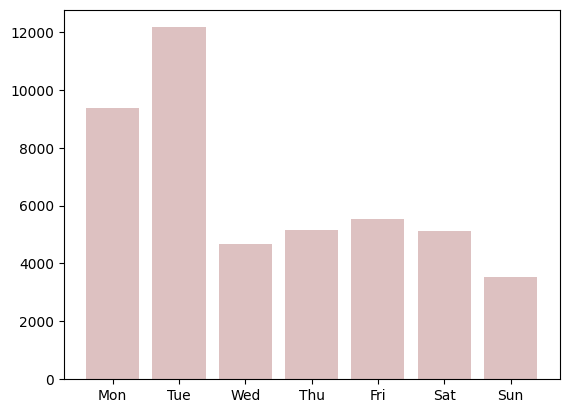

In [18]:
plt.hist(df.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
;


''

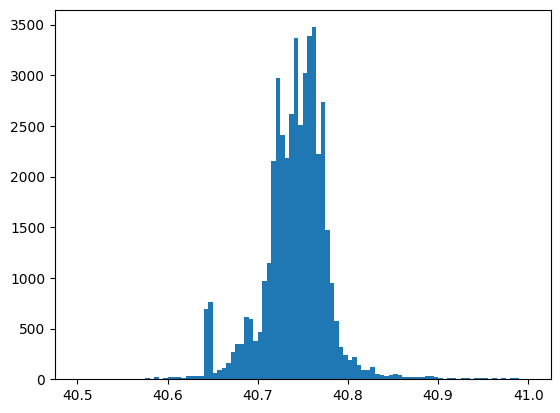

In [19]:
plt.hist(df['Lat'], bins=100, range = (40.5, 41))
;

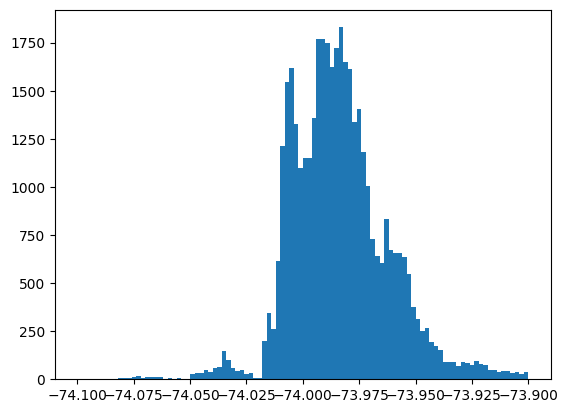

In [20]:
plt.hist(df['Lon'], bins=100, range = (-74.1, -73.9));

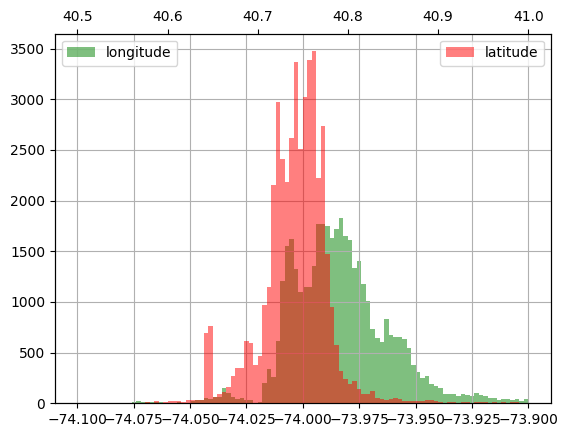

In [21]:
plt.hist(df['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(df['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
plt.legend(loc='best');

(40.7, 41.0)

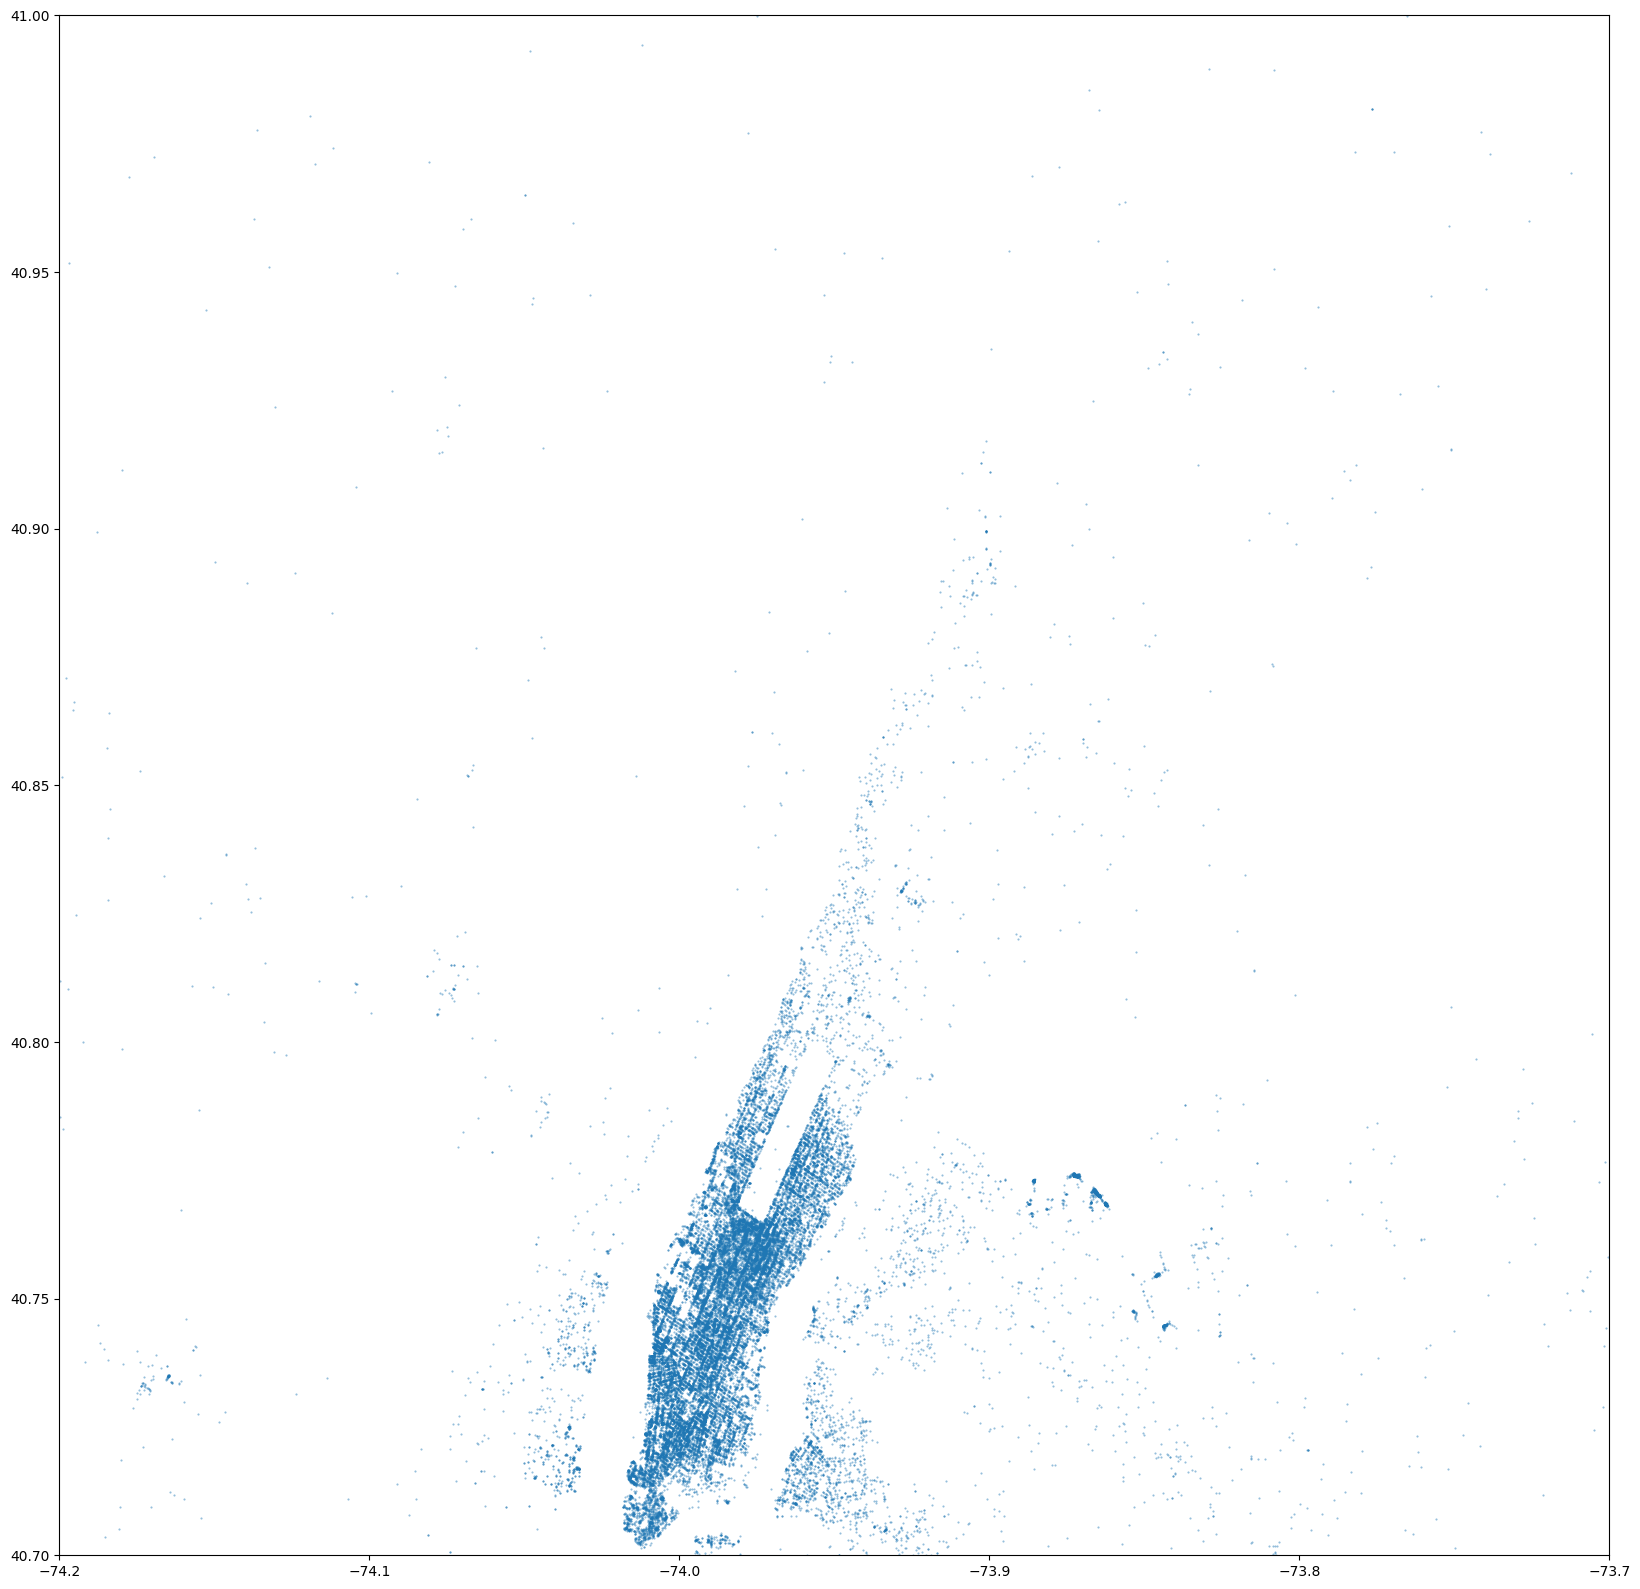

In [22]:
plt.figure(figsize=(20, 20))
plt.plot(df['Lon'], df['Lat'], '.', ms=1, alpha=.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)